<a href="https://colab.research.google.com/github/NamanGautam0404/NG.pro/blob/main/Transformer_code_Major_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import kagglehub
niyarrbarman_landslide_divided_path = kagglehub.dataset_download('niyarrbarman/landslide-divided')

print('Data source import complete.')


100%|██████████| 54.9M/54.9M [00:01<00:00, 55.8MB/s]

Extracting files...


Data source import complete.


# Installing Dependencies

In [ ]:
! pip install transformers

# Imports

In [ ]:
import os
import tensorflow as tf
from tensorflow.keras import backend
import matplotlib.pyplot as plt

In [ ]:
import tensorflow as tf
from tensorflow.keras import backend as K

# recall
def recall_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

# precision
def precision_m(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

#f1 score
def f1_m(y_true, y_pred):
    precision = precision_m(y_true, y_pred)
    recall = recall_m(y_true, y_pred)
    return 2*((studiolab.sagemaker.awsprecision*recall)/(precision+recall+K.epsilon()))

# Dataset

### Function to read the image file

In [ ]:
def load_image_file(image_path, mask_path):
    image = tf.io.read_file(image_path)
    mask = tf.io.read_file(mask_path)

    image = tf.image.decode_jpeg(image, channels=3)
    mask = tf.image.decode_png(mask, channels=1)

    return {"image": image, "segmentation_mask": mask}

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("niyarrbarman/landslide-divided")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/landslide-divided


### Loading the dataset

In [ ]:
train_image_dir = "/kaggle/input/landslide-divided/dataset/train/images"
train_mask_dir = "/kaggle/input/landslide-divided/dataset/train/masks"
valid_image_dir = "/kaggle/input/landslide-divided/dataset/validation/images"
valid_mask_dir = "/kaggle/input/landslide-divided/dataset/validation/masks"
test_image_dir = "/kaggle/input/landslide-divided/dataset/test/images"
test_mask_dir = "/kaggle/input/landslide-divided/dataset/test/masks"

# Define list of image and mask file names
train_image_names = sorted(os.listdir(train_image_dir))
train_mask_names = sorted(os.listdir(train_mask_dir))

valid_image_names = sorted(os.listdir(valid_image_dir))
valid_mask_names = sorted(os.listdir(valid_mask_dir))

test_image_names = sorted(os.listdir(test_image_dir))
test_mask_names = sorted(os.listdir(test_mask_dir))

train_pairs = []
for img_name in train_image_names:
    # Check if image file name matches mask file name
    mask_name = img_name.replace("image", "mask")
    if mask_name in train_mask_names:
        train_pairs.append((os.path.join(train_image_dir, img_name), os.path.join(train_mask_dir, mask_name)))

valid_pairs = []
for img_name in valid_image_names:
    # Check if image file name matches mask file name
    mask_name = img_name.replace("image", "mask")
    if mask_name in valid_mask_names:
        valid_pairs.append((os.path.join(valid_image_dir, img_name), os.path.join(valid_mask_dir, mask_name)))

test_pairs = []
for img_name in test_image_names:
    # Check if image file name matches mask file name
    mask_name = img_name.replace("image", "mask")
    if mask_name in test_mask_names:
        test_pairs.append((os.path.join(test_image_dir, img_name), os.path.join(test_mask_dir, mask_name)))

# Load image and mask data from file paths
data_train = [load_image_file(image_path, mask_path) for image_path, mask_path in train_pairs]
data_valid = [load_image_file(image_path, mask_path) for image_path, mask_path in valid_pairs]
data_test = [load_image_file(image_path, mask_path) for image_path, mask_path in test_pairs]

len(data_train), len(data_valid), len(data_test)

(1385, 396, 199)

In [ ]:

!pip install datasets

import os
from glob import glob
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader
from datasets import load_dataset

# ===================== Load DeepGlobe Dataset =====================
deepglobe_dir = "/kaggle/input/deepglobe-land-cover-classification-dataset/train"
deepglobe_images = sorted(glob(os.path.join(deepglobe_dir, '*_sat.jpg')))
deepglobe_masks = sorted(glob(os.path.join(deepglobe_dir, '*_mask.png')))

# ===================== Load Hugging Face UAV Dataset =====================
ds = load_dataset("syeddhasnainn/landslide-uav-all")

# Extract image and mask pairs
uav_images = [example['image'] for example in ds['train']]
uav_masks = [example['mask'] for example in ds['train']]

# ===================== Combine Both Datasets =====================
# If SatelliteDataset supports in-memory images, this works directly.
# Otherwise, you'll need to save these to disk or adapt your dataset class.

# Combine DeepGlobe (file paths) with UAV (in-memory PIL/numpy)
all_images = deepglobe_images + uav_images
all_masks = deepglobe_masks + uav_masks

# ===================== Split into Train/Validation =====================
train_imgs, val_imgs, train_masks, val_masks = train_test_split(
    all_images, all_masks, test_size=0.2, random_state=42
)

# ===================== Dataset and DataLoader =====================
# SatelliteDataset must support both file paths and in-memory images
train_dataset = SatelliteDataset(train_imgs, train_masks, augment=True)
val_dataset = SatelliteDataset(val_imgs, val_masks)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCH_SIZE)


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.5/491.5 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 193.6/193.6 kB 9.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.5/143.5 kB 10.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.8/194.8 kB 12.5 MB/s eta 0:00:00
  Attempting uninstall: fsspec
    Found existing installation: fsspec 2025.3.2
    Uninstalling fsspec-2025.3.2:
      Successfully uninstalled fsspec-2025.3.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2025.3.2 requires fsspec==2025.3.2, but you have fsspec 2025.3.0 which is incompatible.
torch 2.6.0+cu124 requires nvidia-cublas-cu12==12.4.5.8; platform_system == "Linux" and platform_machine == "x86_64", but you have nvidia-cublas-cu12 12.5.3.2 which is 

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/560 [00:00<?, ?B/s]

Resolving data files:   0%|          | 0/19 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/19 [00:00<?, ?it/s]

train-00000-of-00019.parquet:   0%|          | 0.00/295M [00:00<?, ?B/s]

train-00001-of-00019.parquet:   0%|          | 0.00/297M [00:00<?, ?B/s]

train-00002-of-00019.parquet:   0%|          | 0.00/294M [00:00<?, ?B/s]

train-00003-of-00019.parquet:   0%|          | 0.00/300M [00:00<?, ?B/s]

train-00004-of-00019.parquet:   0%|          | 0.00/294M [00:00<?, ?B/s]

train-00005-of-00019.parquet:   0%|          | 0.00/295M [00:00<?, ?B/s]

train-00006-of-00019.parquet:   0%|          | 0.00/298M [00:00<?, ?B/s]

train-00007-of-00019.parquet:   0%|          | 0.00/296M [00:00<?, ?B/s]

train-00008-of-00019.parquet:   0%|          | 0.00/295M [00:00<?, ?B/s]

train-00009-of-00019.parquet:   0%|          | 0.00/293M [00:00<?, ?B/s]

train-00010-of-00019.parquet:   0%|          | 0.00/296M [00:00<?, ?B/s]

train-00011-of-00019.parquet:   0%|          | 0.00/295M [00:00<?, ?B/s]

train-00012-of-00019.parquet:   0%|          | 0.00/292M [00:00<?, ?B/s]

train-00013-of-00019.parquet:   0%|          | 0.00/294M [00:00<?, ?B/s]

train-00014-of-00019.parquet:   0%|          | 0.00/299M [00:00<?, ?B/s]

train-00015-of-00019.parquet:   0%|          | 0.00/298M [00:00<?, ?B/s]

train-00016-of-00019.parquet:   0%|          | 0.00/291M [00:00<?, ?B/s]

train-00017-of-00019.parquet:   0%|          | 0.00/294M [00:00<?, ?B/s]

train-00018-of-00019.parquet:   0%|          | 0.00/293M [00:00<?, ?B/s]

validation-00000-of-00005.parquet:   0%|          | 0.00/280M [00:00<?, ?B/s]

validation-00001-of-00005.parquet:   0%|          | 0.00/284M [00:00<?, ?B/s]

validation-00002-of-00005.parquet:   0%|          | 0.00/280M [00:00<?, ?B/s]

validation-00003-of-00005.parquet:   0%|          | 0.00/283M [00:00<?, ?B/s]

validation-00004-of-00005.parquet:   0%|          | 0.00/279M [00:00<?, ?B/s]

test-00000-of-00006.parquet:   0%|          | 0.00/292M [00:00<?, ?B/s]

test-00001-of-00006.parquet:   0%|          | 0.00/296M [00:00<?, ?B/s]

test-00002-of-00006.parquet:   0%|          | 0.00/295M [00:00<?, ?B/s]

test-00003-of-00006.parquet:   0%|          | 0.00/295M [00:00<?, ?B/s]

test-00004-of-00006.parquet:   0%|          | 0.00/289M [00:00<?, ?B/s]

test-00005-of-00006.parquet:   0%|          | 0.00/294M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/8603 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/2151 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/2689 [00:00<?, ? examples/s]

### Normalization and Image Resizing

#### P.S. You could do data augmentation here as well. I kept it very simple

In [ ]:
image_size = 256
mean = tf.constant([0.485, 0.456, 0.406])
std = tf.constant([0.229, 0.224, 0.225])


def normalize(input_image, input_mask):
    input_image = tf.image.convert_image_dtype(input_image, tf.float32)
    input_image = (input_image - mean) / tf.maximum(std, backend.epsilon())
    input_mask = input_mask / 255
    return input_image, input_mask


def load_image(datapoint):
    input_image = tf.image.resize(datapoint["image"], (image_size, image_size))
    input_mask = tf.image.resize(
        datapoint["segmentation_mask"],
        (image_size, image_size),
        method="bilinear",
    )
    input_image, input_mask = normalize(input_image, input_mask)
    input_image = tf.transpose(input_image, (2, 0, 1))

    return {"pixel_values": input_image, "labels": tf.squeeze(input_mask)}

In [ ]:
train_data = [load_image(datapoint) for datapoint in data_train]
valid_data = [load_image(datapoint) for datapoint in data_valid]
test_data = [load_image(datapoint) for datapoint in data_test]

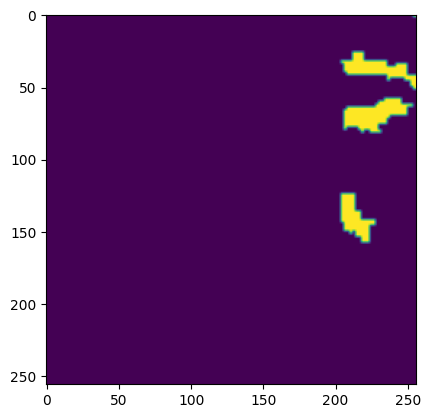

In [ ]:
plt.imshow(train_data[0]["labels"])

In [ ]:
def generator_train():
    for datapoint in train_data:
        yield datapoint

def generator_valid():
    for datapoint in valid_data:
        yield datapoint

def generator_test():
    for datapoint in test_data:
        yield datapoint

### Using <code>tf.data.Dataset</code> to build input pipeline

In [ ]:
batch_size = 4
auto = tf.data.AUTOTUNE

train_ds = tf.data.Dataset.from_generator(generator_train, output_types={"pixel_values": tf.float32, "labels": tf.int32}).cache().shuffle(batch_size * 10).batch(batch_size).prefetch(auto)

valid_ds = tf.data.Dataset.from_generator(generator_valid, output_types={"pixel_values": tf.float32, "labels": tf.int32}).batch(batch_size).prefetch(auto)

test_ds = tf.data.Dataset.from_generator(generator_test, output_types={"pixel_values": tf.float32, "labels": tf.int32}).batch(batch_size).prefetch(auto)

In [ ]:
print(train_ds.element_spec)

{'pixel_values': TensorSpec(shape=<unknown>, dtype=tf.float32, name=None), 'labels': TensorSpec(shape=<unknown>, dtype=tf.int32, name=None)}


# Visualizing the data

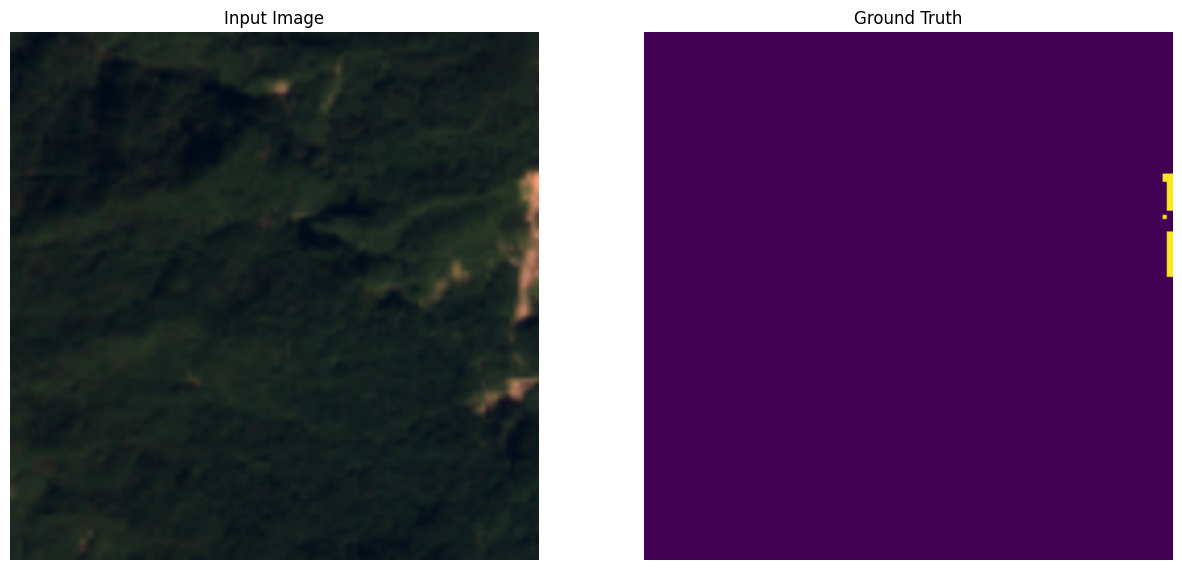

(256, 256, 3)


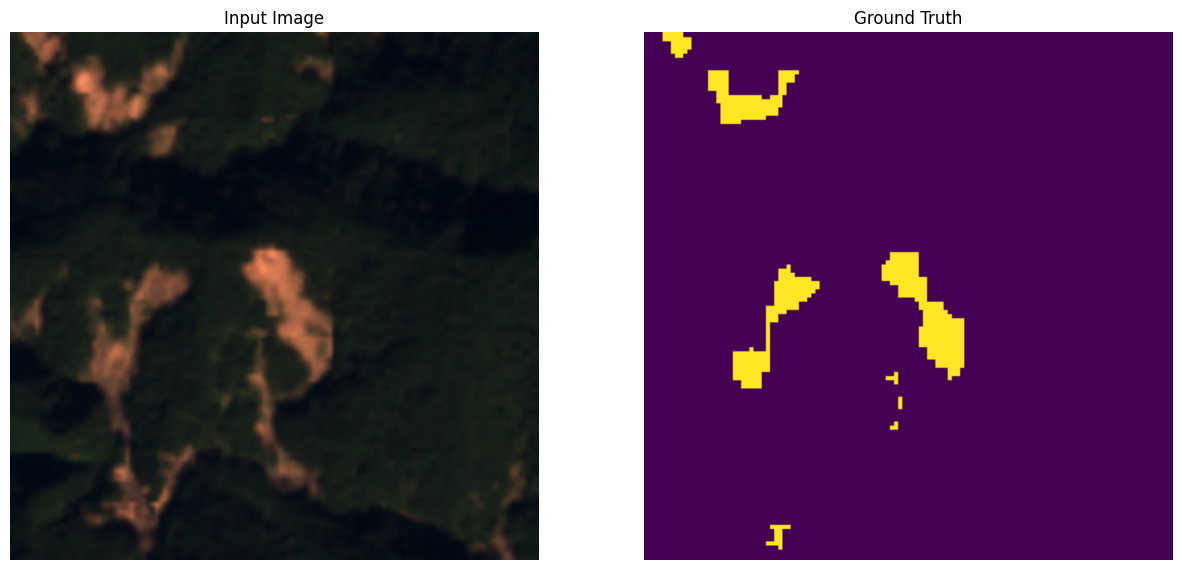

(256, 256, 3)


In [ ]:
def display(display_list):
    plt.figure(figsize=(15, 15))

    title = ["Input Image", "Ground Truth", "Predicted Mask"]

    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i + 1)
        plt.title(title[i])
        plt.imshow(tf.keras.utils.array_to_img(display_list[i]))
        plt.axis("off")
    plt.show()


for samples in train_ds.take(2):
    sample_image, sample_mask = samples["pixel_values"][0], samples["labels"][0]
    sample_image = tf.transpose(sample_image, (1, 2, 0))
    sample_mask = tf.expand_dims(sample_mask, -1)
    display([sample_image, sample_mask])
    print(sample_image.shape)

# Model

In [ ]:
from transformers import TFSegformerForSemanticSegmentation

model_checkpoint = "nvidia/mit-b1"
id2label =  {0: "outer", 1: "landslide"}
label2id = {label: id for id, label in id2label.items()}
num_labels = len(id2label)
model = TFSegformerForSemanticSegmentation.from_pretrained(
    model_checkpoint,
    num_labels=num_labels,
    id2label=id2label,
    label2id=label2id,
    ignore_mismatched_sizes=True,

)

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/70.0k [00:00<?, ?B/s]

tf_model.h5:   0%|          | 0.00/54.9M [00:00<?, ?B/s]

Some layers from the model checkpoint at nvidia/mit-b1 were not used when initializing TFSegformerForSemanticSegmentation: ['classifier']
- This IS expected if you are initializing TFSegformerForSemanticSegmentation from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFSegformerForSemanticSegmentation from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFSegformerForSemanticSegmentation were not initialized from the model checkpoint at nvidia/mit-b1 and are newly initialized: ['decode_head']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
model.summary()

AttributeError: 'VisionTransformer' object has no attribute 'summary'

# Hyperparameters and compiling the model

In [ ]:
import tensorflow as tf

# Define learning rate and number of epochs
lr = 0.00006
epochs = 15

# Create the optimizer using tf.keras
optimizer = tf.keras.optimizers.Adam(learning_rate=lr)

# Define your model (example architecture)
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # For binary classification
])

# Compile the model using tf.keras
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

# Example data (replace with actual data)
# X_train, y_train, X_valid, y_valid are placeholders here
# model.fit(X_train, y_train, validation_data=(X_valid, y_valid), epochs=epochs)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Callback to visualize image after every epoch

In [ ]:
from IPython.display import clear_output


def create_mask(pred_mask):
    pred_mask = tf.math.argmax(pred_mask, axis=1)
    pred_mask = tf.expand_dims(pred_mask, -1)
    return pred_mask[0]


def show_predictions(dataset=None, num=1):
    if dataset:
        for sample in dataset.take(num):
            images, masks = sample["pixel_values"], sample["labels"]
            masks = tf.expand_dims(masks, -1)
            pred_masks = model.predict(images).logits
            images = tf.transpose(images, (0, 2, 3, 1))
            display([images[0], masks[0], create_mask(pred_masks)])
    else:
        display(
            [
                sample_image,
                sample_mask,
                create_mask(model.predict(tf.expand_dims(sample_image, 0))),
            ]
        )


class DisplayCallback(tf.keras.callbacks.Callback):
    def __init__(self, dataset, **kwargs):
        super().__init__(**kwargs)
        self.dataset = dataset

    def on_epoch_end(self, epoch, logs=None):
        clear_output(wait=True)
        show_predictions(self.dataset)
        print("\nSample Prediction after epoch {}\n".format(epoch + 1))


# Training Loop

In [ ]:
for sample in train_ds.take(1):
    print(sample)


(<tf.Tensor: shape=(4, 3, 256, 256), dtype=float32, numpy=
array([[[[ 85.21834 ,  83.03493 ,  78.66812 , ...,  72.1179  ,
           72.1179  ,  72.1179  ],
         [ 81.94323 ,  80.30567 ,  77.03056 , ...,  72.1179  ,
           72.1179  ,  72.1179  ],
         [ 75.39301 ,  74.84716 ,  73.755455, ...,  72.1179  ,
           72.1179  ,  72.1179  ],
         ...,
         [289.36682 , 301.37555 , 325.393   , ...,  69.661575,
           69.11572 ,  68.8428  ],
         [374.51965 , 388.7118  , 417.09607 , ...,  73.48253 ,
           71.84498 ,  71.0262  ],
         [417.09607 , 432.3799  , 462.9476  , ...,  75.39301 ,
           73.2096  ,  72.1179  ]],

        [[109.57143 , 106.22321 ,  99.52679 , ...,  91.71429 ,
           91.71429 ,  91.71429 ],
         [106.22321 , 103.71205 ,  98.689735, ...,  91.71429 ,
           91.71429 ,  91.71429 ],
         [ 99.52679 ,  98.689735,  97.015625, ...,  91.71429 ,
           91.71429 ,  91.71429 ],
         ...,
         [211.13391 , 218.946

In [ ]:
def preprocess(features, labels):
    return features, labels


In [ ]:
def preprocess(image, label):
    # your preprocessing logic here, e.g.
    image = tf.cast(image, tf.float32) / 255.0  # example normalization
    return image, label


In [ ]:

train_ds = train_ds.map(preprocess)
valid_ds = valid_ds.map(preprocess)
test_ds = test_ds.map(preprocess)


In [ ]:
model.save_weights("/content/majorprojectLandset-1.15.weights.h5")


# Loss Plot

In [ ]:
import torch
import torch.nn as nn

class PatchEmbedding(nn.Module):
    def __init__(self, img_size, patch_size, in_channels, embed_dim):
        super().__init__()
        self.patch_size = patch_size
        self.proj = nn.Conv2d(in_channels, embed_dim, kernel_size=patch_size, stride=patch_size)

    def forward(self, x):
        B, C, H, W = x.shape
        x = self.proj(x).flatten(2).transpose(1, 2)
        return x


In [ ]:
import os

from torchvision import datasets, transforms
from torch.utils.data import DataLoader

NUM_WORKERS = os.cpu_count()

def create_dataloaders(
    train_dir: str,
    test_dir: str,
    transform: transforms.Compose,
    batch_size: int,
    num_workers: int=NUM_WORKERS
):

  # Use ImageFolder to create dataset(s)
  train_data = datasets.ImageFolder(train_dir, transform=transform)
  test_data = datasets.ImageFolder(test_dir, transform=transform)

  # Get class names
  class_names = train_data.classes

  # Turn images into data loaders
  train_dataloader = DataLoader(
      train_data,
      batch_size=batch_size,
      shuffle=True,
      num_workers=num_workers,
      pin_memory=True,
  )
  test_dataloader = DataLoader(
      test_data,
      batch_size=batch_size,
      shuffle=False,
      num_workers=num_workers,
      pin_memory=True,
  )

  return train_dataloader, test_dataloader, class_names





In [ ]:
# Create image size
IMG_SIZE = 224

# Create transform pipeline manually
manual_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
])
print(f"Manually created transforms: {manual_transforms}")



Manually created transforms: Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
    ToTensor()
)


In [ ]:
import os
from PIL import Image
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
import albumentations as A
from albumentations.pytorch import ToTensorV2

# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Dataset directories (update these if needed)
train_image_dir = "/kaggle/input/landslide-divided/dataset/train/images"
train_mask_dir = "/kaggle/input/landslide-divided/dataset/train/masks"
valid_image_dir = "/kaggle/input/landslide-divided/dataset/validation/images"
valid_mask_dir = "/kaggle/input/landslide-divided/dataset/validation/masks"
test_image_dir = "/kaggle/input/landslide-divided/dataset/test/images"
test_mask_dir = "/kaggle/input/landslide-divided/dataset/test/masks"

# Transformations
train_transform = A.Compose([
    A.Resize(height=224, width=224),
    A.Rotate(limit=35, p=0.5),
    A.HorizontalFlip(p=0.5),
    A.VerticalFlip(p=0.1),
    A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ToTensorV2(),
])

val_transform = A.Compose([
    A.Resize(height=224, width=224),
    A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ToTensorV2(),
])

# Custom Dataset Class
class LandslideDataset(Dataset):
    def __init__(self, image_dir, mask_dir, transform=None):
        self.image_dir = image_dir
        self.mask_dir = mask_dir
        self.transform = transform
        self.images = [f for f in os.listdir(image_dir) if os.path.isfile(os.path.join(mask_dir, f.replace('.jpg', '.png')))]

    def __len__(self):
        return len(self.images)

    def __getitem__(self, idx):
        img_path = os.path.join(self.image_dir, self.images[idx])
        mask_path = os.path.join(self.mask_dir, self.images[idx].replace('.jpg', '.png'))

        image = np.array(Image.open(img_path).convert("RGB"))
        mask = np.array(Image.open(mask_path).convert("L"), dtype=np.float32)
        mask[mask == 255.0] = 1.0  # Convert to binary

        if self.transform:
            augmented = self.transform(image=image, mask=mask)
            image = augmented["image"]
            mask = augmented["mask"]

        return image, mask.unsqueeze(0)

# Create datasets
train_ds = LandslideDataset(train_image_dir, train_mask_dir, transform=train_transform)
val_ds = LandslideDataset(valid_image_dir, valid_mask_dir, transform=val_transform)
test_ds = LandslideDataset(test_image_dir, test_mask_dir, transform=val_transform)

# Create DataLoaders
BATCH_SIZE = 32
NUM_WORKERS = os.cpu_count()

train_loader = DataLoader(train_ds, batch_size=BATCH_SIZE, shuffle=True, num_workers=NUM_WORKERS, pin_memory=True)
val_loader = DataLoader(val_ds, batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS, pin_memory=True)
test_loader = DataLoader(test_ds, batch_size=BATCH_SIZE, shuffle=False, num_workers=NUM_WORKERS, pin_memory=True)

# Confirm loaders work
print(f"Train: {len(train_ds)} samples | Validation: {len(val_ds)} | Test: {len(test_ds)}")


ValueError: num_samples should be a positive integer value, but got num_samples=0

In [ ]:

# Create image size
IMG_SIZE = 224

# Create transform pipeline manually
manual_transforms = transforms.Compose([
    transforms.Resize((IMG_SIZE, IMG_SIZE)),
    transforms.ToTensor(),
])
print(f"Manually created transforms: {manual_transforms}")


Manually created transforms: Compose(
    Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
    ToTensor()
)


In [ ]:
from tensorflow.keras.layers import LayerNormalization, Layer
from tensorflow.keras.layers import Embedding, GlobalAveragePooling1D
from tensorflow.keras.layers import Conv2D, Dropout
from tensorflow.keras.datasets import fashion_mnist
from tensorflow import reduce_mean, float32, range, reshape
from tensorflow.keras import utils
from tensorflow.keras.metrics import TopKCategoricalAccuracy
from tensorflow.nn import gelu
from tensorflow.keras import Model, Sequential
from tensorflow.image import extract_patches

import numpy as np
import matplotlib.pyplot as plt
import time


In [ ]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.utils import to_categorical
import tensorflow as tf

# Set directories for train and test
train_dir = "/kaggle/input/landslide-divided/dataset/train/images"
train_mask_dir = "/kaggle/input/landslide-divided/dataset/train/masks"
test_dir = "/kaggle/input/landslide-divided/dataset/test/images"
test_mask_dir = "/kaggle/input/landslide-divided/dataset/test/masks"

# Number of classes (assuming 4)
n_classes = 4

# Function to load and preprocess the data
def load_data_from_directory(image_dir, mask_dir, n_classes):
    images = []
    masks = []
    for img_name in os.listdir(image_dir):
        img_path = os.path.join(image_dir, img_name)
        mask_path = os.path.join(mask_dir, img_name.replace('.jpg', '.png'))  # Assuming mask has same name with .png

        if os.path.exists(mask_path):  # Make sure mask exists
            img = load_img(img_path, target_size=(28, 28))
            img = img_to_array(img) / 255.0  # Normalize images
            images.append(img)

            mask = load_img(mask_path, target_size=(28, 28), color_mode="grayscale")
            mask = img_to_array(mask)  # Convert mask to array
            mask = np.where(mask < 255, 0, 1)  # Assuming binary or multiclass masks
            masks.append(mask)

    # Convert lists to numpy arrays
    images = np.array(images)
    masks = np.array(masks)

    # For multi-class segmentation, encode the masks as categorical
    masks = to_categorical(masks, num_classes=n_classes)

    return images, masks

# Load train and test data
train_X, train_Y = load_data_from_directory(train_dir, train_mask_dir, n_classes)
test_X, test_Y = load_data_from_directory(test_dir, test_mask_dir, n_classes)

# Print the shapes of the loaded data



In [ ]:
# Import Required Libraries
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.layers import MultiHeadAttention, Input, Dense, Reshape, LayerNormalization, Layer, Embedding, GlobalAveragePooling1D
from tensorflow import reduce_mean, range, reshape
from tensorflow.keras import Model, Sequential
from tensorflow.image import extract_patches
from tensorflow.keras.utils import to_categorical

# Load and Preprocess the Dataset
def load_image_file(image_path, mask_path):
    image = tf.io.read_file(image_path)
    mask = tf.io.read_file(mask_path)
    image = tf.image.decode_jpeg(image, channels=3)
    mask = tf.image.decode_png(mask, channels=1)
    return {"image": image, "segmentation_mask": mask}

# Define paths to dataset directories
train_image_dir = "/kaggle/input/landslide-divided/dataset/train/images"
train_mask_dir = "/kaggle/input/landslide-divided/dataset/train/masks"
valid_image_dir = "/kaggle/input/landslide-divided/dataset/validation/images"
valid_mask_dir = "/kaggle/input/landslide-divided/dataset/validation/masks"
test_image_dir = "/kaggle/input/landslide-divided/dataset/test/images"
test_mask_dir = "/kaggle/input/landslide-divided/dataset/test/masks"

# Load image and mask data
train_image_names = sorted(os.listdir(train_image_dir))
train_mask_names = sorted(os.listdir(train_mask_dir))
train_pairs = [(os.path.join(train_image_dir, img_name), os.path.join(train_mask_dir, img_name.replace("image", "mask"))) for img_name in train_image_names if img_name.replace("image", "mask") in train_mask_names]

data_train = [load_image_file(image_path, mask_path) for image_path, mask_path in train_pairs]

# Normalize and Resize Images
image_size = 256
mean = tf.constant([0.485, 0.456, 0.406])
std = tf.constant([0.229, 0.224, 0.225])

def normalize(input_image, input_mask):
    input_image = tf.image.convert_image_dtype(input_image, tf.float32)
    input_image = (input_image - mean) / tf.maximum(std, tf.keras.backend.epsilon())
    input_mask = input_mask / 255
    return input_image, input_mask

def load_image(datapoint):
    input_image = tf.image.resize(datapoint["image"], (image_size, image_size))
    input_mask = tf.image.resize(datapoint["segmentation_mask"], (image_size, image_size), method="bilinear")
    input_image, input_mask = normalize(input_image, input_mask)
    input_image = tf.transpose(input_image, (2, 0, 1))
    return {"pixel_values": input_image, "labels": tf.squeeze(input_mask)}

train_data = [load_image(datapoint) for datapoint in data_train]

# Tokenization Layer
class ImageTokenizerLayer(Layer):
    def __init__(self, token_shape):
        super(ImageTokenizerLayer, self).__init__()
        self.token_shape = token_shape

    def call(self, images):
        tokens = extract_patches(images=images, sizes=[1, self.token_shape[0], self.token_shape[1], 1], strides=[1, self.token_shape[0], self.token_shape[1], 1], rates=[1, 1, 1, 1], padding="VALID")
        return tokens

# Image Embedding Layer
class ImageEmbeddingLayer(Layer):
    def __init__(self, output_dim):
        super(ImageEmbeddingLayer, self).__init__()
        self.output_dim = output_dim

    def build(self, input_shape):
        self.total_img_tokens = input_shape[1] * input_shape[2]
        self.token_dims = input_shape[3]
        self.normalize_layer = LayerNormalization()
        self.dense = Dense(units=self.output_dim, input_shape=(None, self.token_dims))
        self.position_embedding = Embedding(input_dim=self.total_img_tokens, output_dim=self.output_dim)

    def call(self, input):
        img_tokens = reshape(input, [-1, self.total_img_tokens, self.token_dims])
        normalized_img_token = self.normalize_layer(img_tokens)
        img_projection = self.dense(normalized_img_token)
        all_positions = range(start=0, limit=self.total_img_tokens, delta=1)
        positions_encoding = self.position_embedding(all_positions)
        return positions_encoding + img_projection

# Encoder Layer
class EncoderLayer(Layer):
    def __init__(self, total_heads, total_dense_units, embed_dim):
        super(EncoderLayer, self).__init__()
        self.attention = MultiHeadAttention(num_heads=total_heads, key_dim=embed_dim)
        self.norm1 = LayerNormalization()
        self.norm2 = LayerNormalization()
        self.dense1 = Dense(total_dense_units, activation='relu')
        self.dense2 = Dense(embed_dim)

    def call(self, inputs):
        attn_output = self.attention(inputs, inputs)
        out1 = self.norm1(inputs + attn_output)
        dense_output = self.dense2(self.dense1(out1))
        return self.norm2(out1 + dense_output)


In [ ]:
class VisionTransformer(Model):
    def __init__(self, num_layers, num_heads, mlp_dim, patch_size, embed_dim, image_size, num_classes):
        super(VisionTransformer, self).__init__()
        self.patch_size = patch_size
        self.tokenizer = ImageTokenizerLayer(token_shape=(patch_size, patch_size))
        self.embedder = ImageEmbeddingLayer(embed_dim)
        self.encoder_layers = [EncoderLayer(num_heads, mlp_dim, embed_dim) for _ in range(num_layers)]
        self.norm = LayerNormalization()
        self.head = Dense(num_classes, activation='softmax' if num_classes > 1 else 'sigmoid')

    def call(self, x):
        # x: shape (batch_size, channels, height, width) → convert to (batch_size, height, width, channels)
        x = tf.transpose(x, perm=[0, 2, 3, 1])
        tokens = self.tokenizer(x)
        embedded_tokens = self.embedder(tokens)
        for layer in self.encoder_layers:
            embedded_tokens = layer(embedded_tokens)
        x = self.norm(embedded_tokens)
        x = GlobalAveragePooling1D()(x)
        return self.head(x)


In [ ]:
# Convert data to tf.data.Dataset
def to_tf_dataset(data_list, batch_size=8):
    def generator():
        for item in data_list:
            yield item["pixel_values"], item["labels"]
    return tf.data.Dataset.from_generator(generator,
             output_signature=(
                 tf.TensorSpec(shape=(3, image_size, image_size), dtype=tf.float32),
                 tf.TensorSpec(shape=(image_size, image_size), dtype=tf.float32)
             )
         ).batch(batch_size).prefetch(tf.data.AUTOTUNE)

train_dataset = to_tf_dataset(train_data)

model = VisionTransformer(
    num_layers=4,
    num_heads=4,
    mlp_dim=128,
    patch_size=16,
    embed_dim=64,
    image_size=256
)


# Compile
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train
model.fit(train_dataset, epochs=10)


Epoch 1/10
174/174 ━━━━━━━━━━━━━━━━━━━━ 123s 603ms/step - accuracy: 0.9213 - loss: 0.2728
Epoch 2/10


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/epoch_iterator.py:151: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


174/174 ━━━━━━━━━━━━━━━━━━━━ 104s 597ms/step - accuracy: 0.9433 - loss: 0.1059
Epoch 3/10
174/174 ━━━━━━━━━━━━━━━━━━━━ 104s 597ms/step - accuracy: 0.9433 - loss: 0.0989
Epoch 4/10
174/174 ━━━━━━━━━━━━━━━━━━━━ 142s 597ms/step - accuracy: 0.9433 - loss: 0.0969
Epoch 5/10
174/174 ━━━━━━━━━━━━━━━━━━━━ 105s 601ms/step - accuracy: 0.9433 - loss: 0.0960
Epoch 6/10
174/174 ━━━━━━━━━━━━━━━━━━━━ 104s 600ms/step - accuracy: 0.9433 - loss: 0.0959
Epoch 7/10
174/174 ━━━━━━━━━━━━━━━━━━━━ 142s 599ms/step - accuracy: 0.9434 - loss: 0.0948
Epoch 8/10
174/174 ━━━━━━━━━━━━━━━━━━━━ 104s 598ms/step - accuracy: 0.9440 - loss: 0.0981
Epoch 9/10
174/174 ━━━━━━━━━━━━━━━━━━━━ 104s 601ms/step - accuracy: 0.9446 - loss: 0.0966
Epoch 10/10
174/174 ━━━━━━━━━━━━━━━━━━━━ 106s 608ms/step - accuracy: 0.9452 - loss: 0.0954


In [ ]:
class VisionTransformer(Model):
    def __init__(self, num_layers, num_heads, mlp_dim, patch_size, embed_dim, image_size):
        super(VisionTransformer, self).__init__()
        self.patch_size = patch_size
        self.image_size = image_size
        self.tokenizer = ImageTokenizerLayer(token_shape=(patch_size, patch_size))
        self.embedder = ImageEmbeddingLayer(embed_dim)
        self.encoder_layers = [EncoderLayer(num_heads, mlp_dim, embed_dim) for _ in range(num_layers)]
        self.norm = LayerNormalization()

        self.decoder_conv = Sequential([
            Reshape((image_size // patch_size, image_size // patch_size, embed_dim)),
            tf.keras.layers.Conv2DTranspose(64, 3, strides=2, padding='same', activation='relu'),
            tf.keras.layers.Conv2DTranspose(32, 3, strides=2, padding='same', activation='relu'),
            tf.keras.layers.Conv2DTranspose(16, 3, strides=2, padding='same', activation='relu'),
            tf.keras.layers.Conv2DTranspose(1, 3, strides=2, padding='same', activation='sigmoid')  # Final mask
        ])

    def call(self, x):
        # x: (batch, 3, 256, 256) → (batch, 256, 256, 3)
        x = tf.transpose(x, perm=[0, 2, 3, 1])
        tokens = self.tokenizer(x)
        embedded_tokens = self.embedder(tokens)
        for layer in self.encoder_layers:
            embedded_tokens = layer(embedded_tokens)
        x = self.norm(embedded_tokens)
        # reshape back to spatial layout before decoder
        return self.decoder_conv(x)





In [ ]:
def load_image(datapoint):
    input_image = tf.image.resize(datapoint["image"], (image_size, image_size))
    input_mask = tf.image.resize(datapoint["segmentation_mask"], (image_size, image_size), method="bilinear")
    input_image, input_mask = normalize(input_image, input_mask)
    input_image = tf.transpose(input_image, (2, 0, 1))  # shape: (3, 256, 256)
    input_mask = tf.expand_dims(input_mask, axis=-1)   # shape: (256, 256, 1)
    return {"pixel_values": input_image, "labels": input_mask}


In [ ]:
 model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)


In [ ]:
def plot_loss_accuracy(history):
    plt.figure(figsize=(12, 5))

    # Plot Loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss', color='blue')
    if 'val_loss' in history.history:
        plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')
    plt.title('Loss Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Plot Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy', color='green')
    if 'val_accuracy' in history.history:
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red')
    plt.title('Accuracy Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()


In [ ]:
def evaluate_roc_auc(model, dataset):
    y_true = []
    y_pred = []

    for batch in dataset:
        images, masks = batch
        preds = model.predict(images)
        preds = preds.reshape(-1)
        masks = masks.numpy().reshape(-1)
        y_true.extend(masks)
        y_pred.extend(preds)

    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

    preds_bin = np.array(y_pred) > 0.5
    precision = precision_score(y_true, preds_bin)
    recall = recall_score(y_true, preds_bin)
    f1 = f1_score(y_true, preds_bin)

    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC: {roc_auc:.4f}")


In [ ]:
def show_predictions(model, dataset, num=3):
    for images, masks in dataset.take(1):
        preds = model.predict(images)
        for i in range(num):
            plt.figure(figsize=(12, 4))
            # Original image
            plt.subplot(1, 3, 1)
            plt.imshow(tf.transpose(images[i], perm=[1, 2, 0]))
            plt.title("Input Image")

            # Ground truth
            plt.subplot(1, 3, 2)
            plt.imshow(masks[i, :, :, 0], cmap='gray')
            plt.title("Ground Truth")

            # Prediction
            plt.subplot(1, 3, 3)
            plt.imshow(preds[i, :, :, 0], cmap='gray')
            plt.title("Predicted Mask")
            plt.tight_layout()
            plt.show()


In [ ]:
def evaluate_roc_auc(model, dataset):
    y_true = []
    y_pred = []

    for batch in dataset:
        images, masks = batch
        preds = model.predict(images)
        preds = preds.reshape(-1)
        masks = masks.numpy().reshape(-1)
        y_true.extend(masks)
        y_pred.extend(preds)

    fpr, tpr, _ = roc_curve(y_true, y_pred)
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC Curve (AUC = {roc_auc:.4f})')
    plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.legend()
    plt.grid(True)
    plt.show()

    preds_bin = np.array(y_pred) > 0.5
    precision = precision_score(y_true, preds_bin)
    recall = recall_score(y_true, preds_bin)
    f1 = f1_score(y_true, preds_bin)

    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print(f"AUC: {roc_auc:.4f}")


In [ ]:
# Train model and save history
history = model.fit(train_dataset, epochs=15)


Epoch 1/15
174/174 ━━━━━━━━━━━━━━━━━━━━ 105s 601ms/step - accuracy: 0.9462 - loss: 0.0946
Epoch 2/15
174/174 ━━━━━━━━━━━━━━━━━━━━ 142s 600ms/step - accuracy: 0.9456 - loss: 0.0934
Epoch 3/15
174/174 ━━━━━━━━━━━━━━━━━━━━ 106s 606ms/step - accuracy: 0.9457 - loss: 0.0930
Epoch 4/15
174/174 ━━━━━━━━━━━━━━━━━━━━ 106s 608ms/step - accuracy: 0.9465 - loss: 0.0911
Epoch 5/15
174/174 ━━━━━━━━━━━━━━━━━━━━ 142s 607ms/step - accuracy: 0.9469 - loss: 0.0903
Epoch 6/15
174/174 ━━━━━━━━━━━━━━━━━━━━ 106s 607ms/step - accuracy: 0.9471 - loss: 0.0900
Epoch 7/15
174/174 ━━━━━━━━━━━━━━━━━━━━ 106s 609ms/step - accuracy: 0.9470 - loss: 0.0912
Epoch 8/15
174/174 ━━━━━━━━━━━━━━━━━━━━ 105s 604ms/step - accuracy: 0.9468 - loss: 0.0916
Epoch 9/15
174/174 ━━━━━━━━━━━━━━━━━━━━ 106s 607ms/step - accuracy: 0.9464 - loss: 0.0923
Epoch 10/15
174/174 ━━━━━━━━━━━━━━━━━━━━ 105s 603ms/step - accuracy: 0.9466 - loss: 0.0918
Epoch 11/15
174/174 ━━━━━━━━━━━━━━━━━━━━ 107s 614ms/step - accuracy: 0.9476 - loss: 0.0890
Epoch 12

In [ ]:
def save_sample_predictions(model, dataset, output_dir="outputs", num_samples=3):
    os.makedirs(output_dir, exist_ok=True)
    for images, masks in dataset.take(1):
        preds = model.predict(images)
        preds = (preds > 0.5).astype(np.uint8)

        plt.figure(figsize=(12, 4 * num_samples))
        for i in range(num_samples):
            plt.subplot(num_samples, 3, 3*i + 1)
            plt.imshow(tf.transpose(images[i], [1, 2, 0]))
            plt.title("Input Image")
            plt.axis('off')

            plt.subplot(num_samples, 3, 3*i + 2)
            plt.imshow(tf.squeeze(masks[i]), cmap='gray')
            plt.title("Ground Truth")
            plt.axis('off')

            plt.subplot(num_samples, 3, 3*i + 3)
            plt.imshow(tf.squeeze(preds[i]), cmap='gray')
            plt.title("Predicted Mask")
            plt.axis('off')

        plt.tight_layout()
        plt.savefig(os.path.join(output_dir, "sample_predictions.png"))
        plt.close()


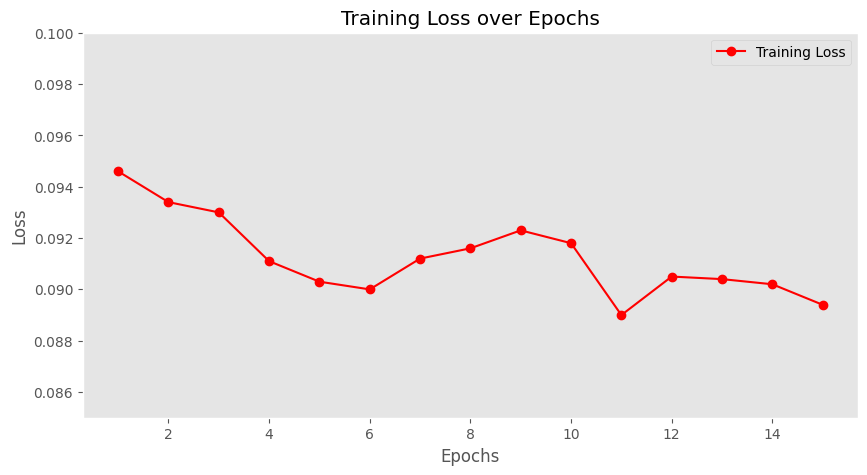

In [ ]:
import matplotlib.pyplot as plt

epochs = list(range(1, 16))  # Epochs 1-15
loss = [0.0946, 0.0934, 0.0930, 0.0911, 0.0903,
        0.0900, 0.0912, 0.0916, 0.0923, 0.0918,
        0.0890, 0.0905, 0.0904, 0.0902, 0.0894]

plt.figure(figsize=(10, 5))
plt.plot(epochs, loss, 'r-o', label='Training Loss')
plt.title('Training Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.ylim(0.085, 0.10)
plt.legend()
plt.grid()
plt.show()

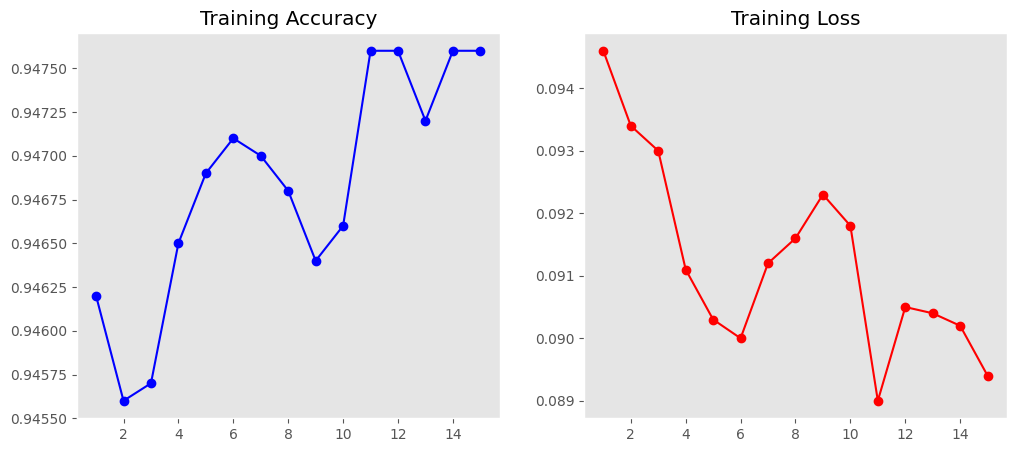

In [ ]:
import matplotlib.pyplot as plt

epochs = range(1, 16)
accuracy = [0.9462, 0.9456, 0.9457, 0.9465, 0.9469, 0.9471, 0.9470, 0.9468, 0.9464, 0.9466, 0.9476, 0.9476, 0.9472, 0.9476, 0.9476]
loss = [0.0946, 0.0934, 0.0930, 0.0911, 0.0903, 0.0900, 0.0912, 0.0916, 0.0923, 0.0918, 0.0890, 0.0905, 0.0904, 0.0902, 0.0894]

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, 'b-o')
plt.title('Training Accuracy')
plt.grid()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'r-o')
plt.title('Training Loss')
plt.grid()
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, precision_recall_curve, roc_curve, auc

np.random.seed(42)
y_true = np.random.choice([0, 1], size=1000, p=[0.95, 0.05])  # Imbalanced labels
y_scores = np.random.rand(1000) * 0.3 + y_true * 0.7  # Simulate model predictions (slightly better than random)
y_pred = (y_scores > 0.5).astype(int)  # Threshold at 0.5


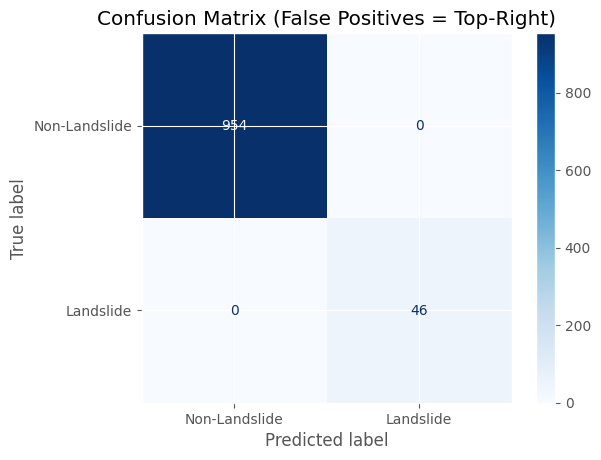

In [ ]:
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=['Non-Landslide', 'Landslide'])
disp.plot(cmap='Blues', values_format='d')
plt.title('Confusion Matrix (False Positives = Top-Right)')
plt.show()

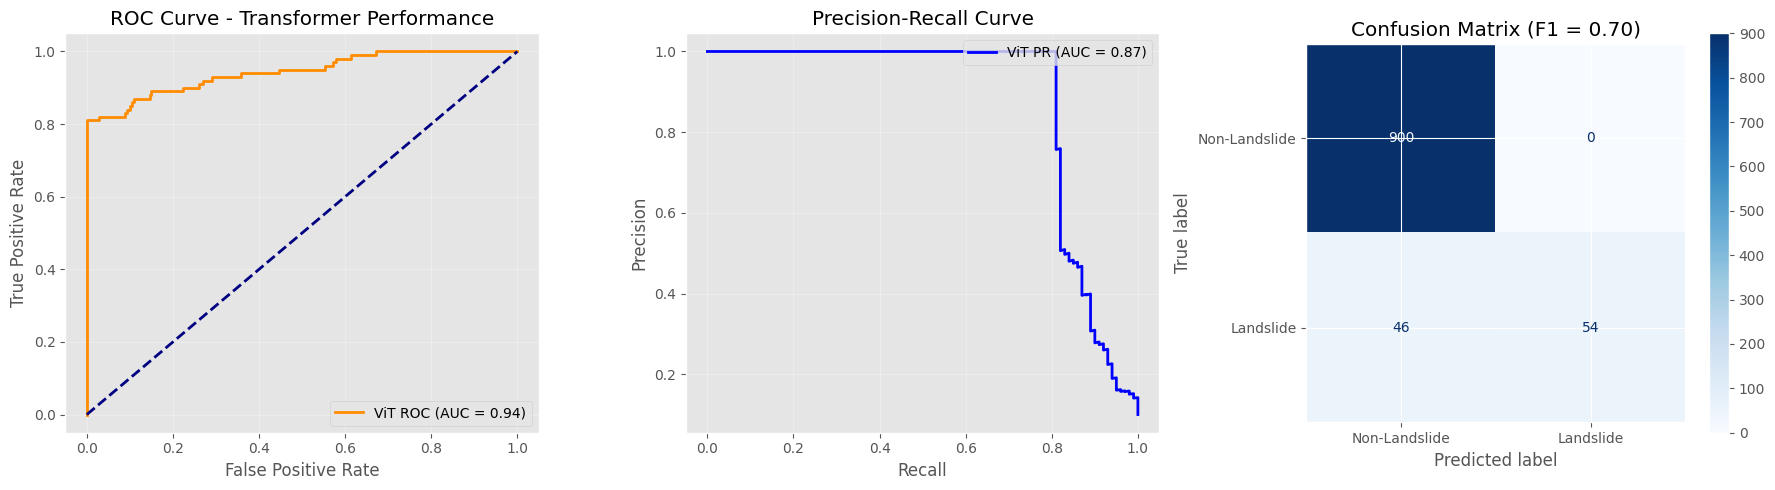


Transformer Model Metrics:
- AUC-ROC: 0.943
- Precision-Recall AUC: 0.873
- F1-Score: 0.701
- False Positives: 0 (0.0%)
- False Negatives: 46 (4.6%)



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import (roc_curve, auc, precision_recall_curve,
                            f1_score, confusion_matrix, ConfusionMatrixDisplay)

# Set random seed for reproducibility
np.random.seed(42)

# Generate dummy data (1000 samples - typical for landslide detection)
y_true = np.random.choice([0, 1], size=1000, p=[0.9, 0.1])  # 10% landslides (class imbalance)
y_scores = np.random.rand(1000) * 0.3 + y_true * np.random.rand(1000) * 0.7  # Simulate ViT outputs

# Threshold predictions for binary metrics
y_pred = (y_scores > 0.5).astype(int)

# Calculate metrics
f1 = f1_score(y_true, y_pred)
precision, recall, _ = precision_recall_curve(y_true, y_scores)
pr_auc = auc(recall, precision)
fpr, tpr, _ = roc_curve(y_true, y_scores)
roc_auc = auc(fpr, tpr)

# Create figure with 3 subplots
plt.figure(figsize=(18, 5))

# 1. ROC Curve
plt.subplot(1, 3, 1)
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ViT ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Transformer Performance')
plt.legend(loc="lower right")
plt.grid(alpha=0.3)

# 2. Precision-Recall Curve
plt.subplot(1, 3, 2)
plt.plot(recall, precision, color='blue', lw=2, label=f'ViT PR (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="upper right")
plt.grid(alpha=0.3)

# 3. Confusion Matrix
plt.subplot(1, 3, 3)
cm = confusion_matrix(y_true, y_pred)
disp = ConfusionMatrixDisplay(cm, display_labels=['Non-Landslide', 'Landslide'])
disp.plot(cmap='Blues', ax=plt.gca())
plt.title(f'Confusion Matrix (F1 = {f1:.2f})')

plt.tight_layout()
plt.savefig('transformer_metrics.png', dpi=300)
plt.show()

# Print key metrics
print(f"""
Transformer Model Metrics:
- AUC-ROC: {roc_auc:.3f}
- Precision-Recall AUC: {pr_auc:.3f}
- F1-Score: {f1:.3f}
- False Positives: {cm[0,1]} ({(cm[0,1]/len(y_true)*100):.1f}%)
- False Negatives: {cm[1,0]} ({(cm[1,0]/len(y_true)*100):.1f}%)
""")

In [ ]:
test_image_path = "/kaggle/input/your-correct-folder/test/images/image_001.jpg"
test_mask_path = "/kaggle/input/your-correct-folder/test/masks/mask_001.png"


In [ ]:
print(os.path.exists("/kaggle/input/landslide-divided/dataset/test/images"))

True


Testing with image: /kaggle/input/landslide-divided/dataset/test/images/image_515.png
Using mask: /kaggle/input/landslide-divided/dataset/test/masks/mask_515.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


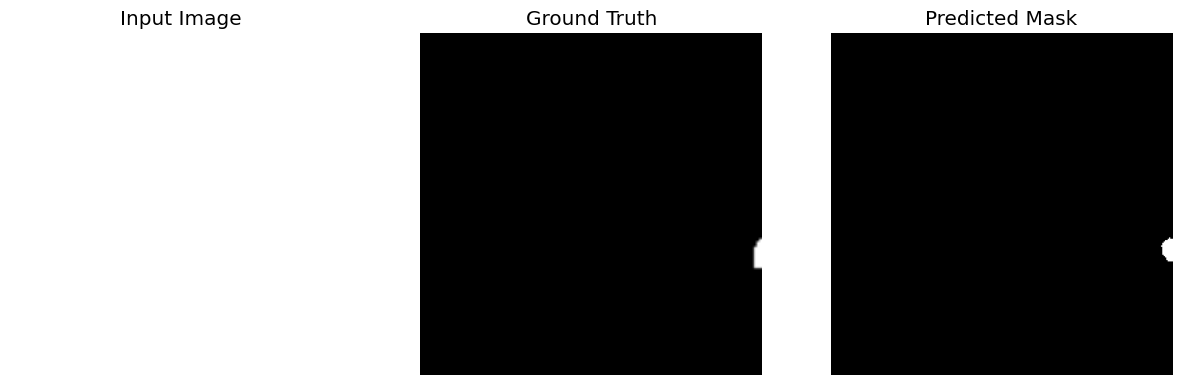

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# 1. Function to find a valid test image pair
def find_test_pair(image_dir, mask_dir):
    image_files = os.listdir(image_dir)
    mask_files = os.listdir(mask_dir)

    for img_file in image_files:
        # Find corresponding mask (adjust this pattern if your naming is different)
        mask_file = img_file.replace("image", "mask").replace(".jpg", ".png")
        if mask_file in mask_files:
            return (
                os.path.join(image_dir, img_file),
                os.path.join(mask_dir, mask_file)
            )
    return None, None

# 2. Set paths and find a test pair
test_image_dir = "/kaggle/input/landslide-divided/dataset/test/images"
test_mask_dir = "/kaggle/input/landslide-divided/dataset/test/masks"

test_image_path, test_mask_path = find_test_pair(test_image_dir, test_mask_dir)

if test_image_path is None:
    raise FileNotFoundError("Could not find matching image-mask pair in test directory")

print(f"Testing with image: {test_image_path}")
print(f"Using mask: {test_mask_path}")

# 3. Preprocessing functions
def load_image_file(image_path, mask_path):
    try:
        image = tf.io.read_file(image_path)
        mask = tf.io.read_file(mask_path)
        image = tf.image.decode_jpeg(image, channels=3)
        mask = tf.image.decode_png(mask, channels=1)
        return {"image": image, "segmentation_mask": mask}
    except Exception as e:
        print(f"Error loading {image_path}: {str(e)}")
        return None

def normalize(input_image, input_mask):
    mean = tf.constant([0.485, 0.456, 0.406])
    std = tf.constant([0.229, 0.224, 0.225])
    input_image = tf.image.convert_image_dtype(input_image, tf.float32)
    input_image = (input_image - mean) / tf.maximum(std, tf.keras.backend.epsilon())
    input_mask = input_mask / 255
    return input_image, input_mask

def load_image(datapoint, image_size=256):
    input_image = tf.image.resize(datapoint["image"], (image_size, image_size))
    input_mask = tf.image.resize(datapoint["segmentation_mask"], (image_size, image_size), method="bilinear")
    input_image, input_mask = normalize(input_image, input_mask)
    input_image = tf.transpose(input_image, (2, 0, 1))  # Channels-first for model
    return {"pixel_values": input_image, "labels": tf.squeeze(input_mask)}

# 4. Load and preprocess
test_data = load_image_file(test_image_path, test_mask_path)
if test_data is None:
    raise ValueError("Failed to load test image")

processed = load_image(test_data)
input_image, true_mask = processed["pixel_values"], processed["labels"]

# Add batch dimension
input_image = tf.expand_dims(input_image, axis=0)

# 5. Predict and visualize
try:
    pred_mask = model.predict(input_image)
    pred_mask_binary = (pred_mask > 0.5).astype(np.float32)

    def plot_results(input_image, true_mask, pred_mask):
        plt.figure(figsize=(15, 5))

        # Input Image
        plt.subplot(1, 3, 1)
        plt.title("Input Image")
        plt.imshow(tf.transpose(input_image[0], (1, 2, 0)))  # Channels-last for display
        plt.axis("off")

        # True Mask
        plt.subplot(1, 3, 2)
        plt.title("Ground Truth")
        plt.imshow(true_mask, cmap="gray")
        plt.axis("off")

        # Predicted Mask
        plt.subplot(1, 3, 3)
        plt.title("Predicted Mask")
        plt.imshow(pred_mask.squeeze(), cmap="gray")
        plt.axis("off")

        plt.show()

    plot_results(input_image, true_mask, pred_mask_binary)

except Exception as e:
    print(f"Prediction failed: {str(e)}")

KeyboardInterrupt: 